# Tutorial: Finetune pretrained model using single cell data with addtional genes and prediction catagories

## Introduction

This tutorial demonstrates how to use **scGenAI** to fine-tune a model for predicting cell types using a new single-cell RNA sequencing (scRNA-seq) dataset that contains additional genes and cell types. In Fine-tune mode, the model template and context method will be automatically adopted from the pretrained model specified in the configuration file.


**Note:**
1. The dataset used for this tutorial is reported in [**Hu et. al., 2021**](https://pubmed.ncbi.nlm.nih.gov/32556286/). The input data train and validation files can be downloaded from link of [**GSE135194**](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE135194).


**Reference**
1. Wu, Z., Gao, S., Diamond, C., Kajigaya, S., Chen, J., Shi, R., Palmer, C., Hsu, A. P., Calvo, K. R., Hickstein, D. D., Holland, S. M., & Young, N. S. (2020). Sequencing of RNA in single cells reveals a distinct transcriptome signature of hematopoiesis in GATA2 deficiency. Blood advances, 4(12), 2656–2670. https://doi.org/10.1182/bloodadvances.2019001352





## Fine-tune the Model (Multiple GPU)

The training process can be easily initiated by calling the `run_finetune_from_config` function in **scGenAI**, using the input files specified in a configuration YAML file. Example template YAML files are available in the `scgenai/examples/config_templates` folder of the package. These templates provide the necessary structure for defining training parameters, model configurations, and input data locations.


In [12]:
from scGenAI.finetuning.finetune import run_finetune_from_config

model_dir: /home/ubuntu/fulldataset/model/GSE181989BW_random_context/best_model/
finetune_dir: /home/ubuntu/fulldataset/model/Finetune_GSE135194BW/
train_file: /home/ubuntu/fulldataset/GSE135194_train.h5ad
val_file: /home/ubuntu/fulldataset/BoneMarrowRefine2_val.h5ad
log_dir: /home/ubuntu/scgenai/examples/logs/
output_dir: /home/ubuntu/scgenai/examples/output
seed: 1314521
cache_dir: /home/ubuntu/scgenai/examples/tmp/cache
mode: Finetune
min_cells: 50
target_feature: ct
multiomics: No
keepIntermediateFiles: Yes
savelog: Yes
savesetting: Yes
model_backbone_name: llama
model_backbone_size: small
context_method: random
num_bins: 10
optimizer: AdamW
weight_decay: 0.01
depth: 2
max_length: 3072
batch_size: 1
learning_rate: 1e-05
num_epochs: 30
world_size: 1
evaluate_during_training: True
hidden_size: 768
num_layers: 12
num_heads: 12
intermediate_size: 1024
stride: 1536


2024-11-01 03:28:36.647 | INFO     | scGenAI.finetuning.finetune:FinetunePreprocessing:68 - New genes found: 3473. Updating custom_tokenizer.
2024-11-01 03:28:36.657 | INFO     | scGenAI.finetuning.finetune:FinetunePreprocessing:79 - New target labels found: 2. Updating label encoder.
2024-11-01 03:31:14.929 | INFO     | scGenAI.utils.distributed:setup_distributed:26 - Distributed setup complete for GPU 0, Total GPUs used: 4
2024-11-01 03:31:14.938 | INFO     | scGenAI.utils.distributed:setup_distributed:26 - Distributed setup complete for GPU 3, Total GPUs used: 4
2024-11-01 03:31:14.943 | INFO     | scGenAI.utils.distributed:setup_distributed:26 - Distributed setup complete for GPU 1, Total GPUs used: 4
2024-11-01 03:31:14.945 | INFO     | scGenAI.utils.distributed:setup_distributed:26 - Distributed setup complete for GPU 2, Total GPUs used: 4
2024-11-01 03:31:17.651 | INFO     | scGenAI.finetuning.finetune:model_finetune_and_eval:132 - Total number of trainable parameters: 82198100;

Plot saved to /home/ubuntu/fulldataset/model/Finetune_GSE135194BW/train_summary.pdf


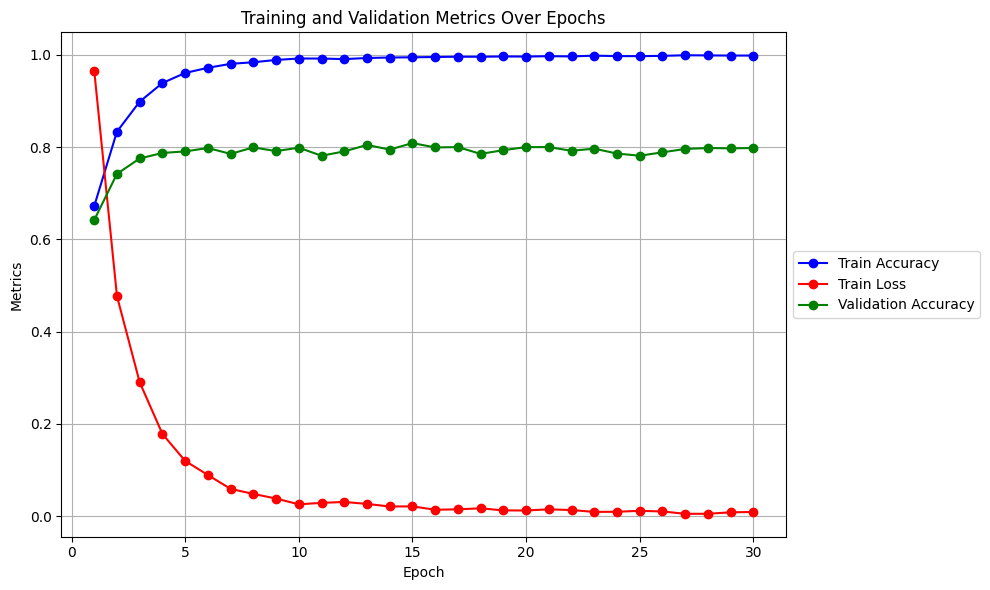

In [11]:
config_file = '/home/ubuntu/scgenai/tutorials/yaml/config_Finetune_GSE135194BW_random_context.yaml'
run_finetune_from_config(config_file)

## Post-Training Model and Results

Upon completion of the training, the trained model will be saved in the `model_dir` as defined in the configuration file. Within this directory, two subfolders will be created: `best_model` and `last_model`. The `best_model` folder contains the model that achieved the highest training performance, while the `last_model` contains the model from the final epoch. Additionally, a `combined_epoch_results.csv` file will be generated in the `model_dir`, summarizing the training performance metrics across all epochs.

### Training Summary

In addition to the output summary files generated after training, the training summary can be directly accessed in Python by loading the saved configuration file.


In [13]:
from scGenAI.config import Config
from scGenAI.data.postprocess import TrainSummary

In [14]:
config = Config(config_file)
summary = TrainSummary(config.finetune_dir)
dfsummary = summary.table()
dfsummary

,Epoch,Validation Accuracy,Train Loss,Train Accuracy
0,1,0.642000,0.965655,0.672291
1,2,0.742000,0.477099,0.833550
2,3,0.775333,0.290277,0.898443
3,4,0.787333,0.178465,0.938892
4,5,0.790667,0.119970,0.960632
5,6,0.798000,0.089447,0.971880
6,7,0.785333,0.059383,0.980424
7,8,0.799333,0.048372,0.983885
8,9,0.791333,0.038447,0.988860
9,10,0.798667,0.025881,0.991997


It can also be plotted using the `summary.plot`:

Plot saved to /home/ubuntu/fulldataset/model/Finetune_GSE135194BW/train_summary.pdf


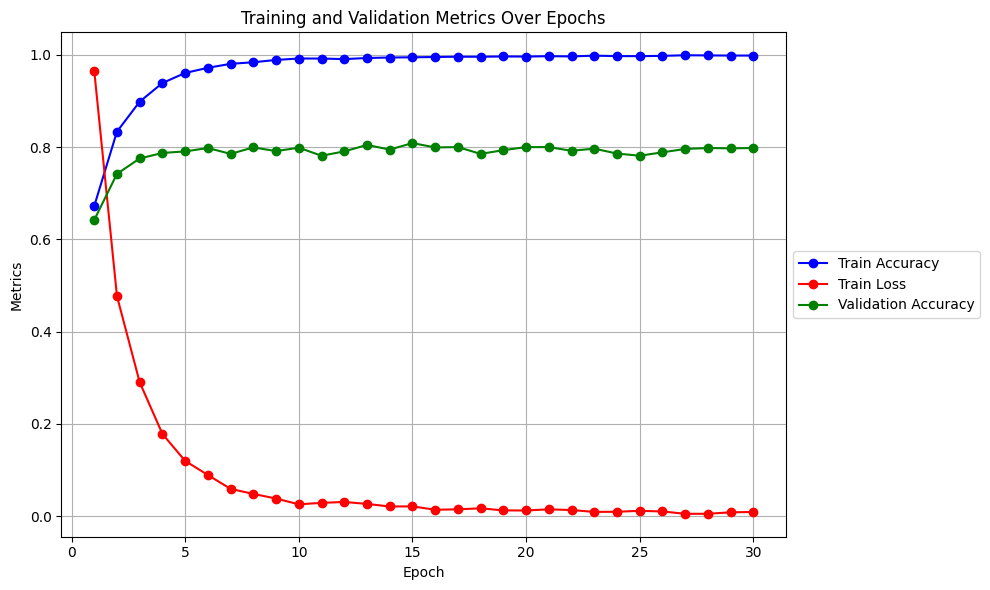

In [15]:
summary.plot(saveplot=True)

## Prediction Using the Trained Model

Similar to the training step, predictions can be run using the `run_prediction_from_config` function in scGenAI with a simple configuration file. Unlike the training configuration, the prediction configuration file only requires the following parameters to be defined: `mode`, `predict_file`, `batch_size`, `model_dir`, and `outputfile`. All other parameters will be adopted from the trained model.


In [16]:
from scGenAI.prediction.predict import run_prediction_from_config

In [17]:
pred_config_file = '/home/ubuntu/scgenai/tutorials/yaml/config_prediction_GSE135194BW_random_context.yaml'
run_prediction_from_config(pred_config_file)

model_dir: /home/ubuntu/fulldataset/model/Finetune_GSE135194BW/best_model/
predict_file: /home/ubuntu/fulldataset/BoneMarrowRefine2_val.h5ad
log_dir: /home/ubuntu/scgenai/examples/logs
output_dir: /home/ubuntu/scgenai/examples/output
seed: 1314521
mode: Predict
min_cells: 50
multiomics: No
keepIntermediateFiles: Yes
savelog: No
savesetting: Yes
model_backbone_name: llama
model_backbone_size: normal
context_method: random
num_bins: 10
optimizer: AdamW
weight_decay: 0.01
depth: 2
max_length: 1024
batch_size: 8
learning_rate: 1e-05
num_epochs: 30
world_size: 1
evaluate_during_training: False
hidden_size: 768
num_layers: 12
num_heads: 12
intermediate_size: 3072
stride: 512


2024-11-02 18:20:51.393 | INFO     | scGenAI.utils.distributed:setup_distributed:26 - Distributed setup complete for GPU 3, Total GPUs used: 4
2024-11-02 18:20:51.405 | INFO     | scGenAI.utils.distributed:setup_distributed:26 - Distributed setup complete for GPU 0, Total GPUs used: 4
2024-11-02 18:20:51.416 | INFO     | scGenAI.utils.distributed:setup_distributed:26 - Distributed setup complete for GPU 1, Total GPUs used: 4
2024-11-02 18:20:51.421 | INFO     | scGenAI.utils.distributed:setup_distributed:26 - Distributed setup complete for GPU 2, Total GPUs used: 4
GPU 0 Predicting: 100%|██████████| 371/371 [01:21<00:00,  4.57it/s]
2024-11-02 18:22:18.397 | INFO     | scGenAI.utils.distributed:cleanup:33 - Cleaned up DDP environment
2024-11-02 18:22:18.397 | INFO     | scGenAI.utils.distributed:cleanup:33 - Cleaned up DDP environment
2024-11-02 18:22:18.397 | INFO     | scGenAI.utils.distributed:cleanup:33 - Cleaned up DDP environment
2024-11-02 18:22:18.397 | INFO     | scGenAI.utils.

The prediction output is a CSV file, as defined in the configuration file. It contains the original metadata extracted from the input prediction file (`obs` slot) along with three additional columns: `context_id`, `PredictedFeature`, and `prediction_score`. 

- `context_id` represents the context used to determine the prediction for the corresponding cell. 
- `PredictedFeature` is the final predicted feature for the cell using the trained model. 
- `prediction_score` indicates the confidence level of the prediction, with a maximum value of 1.

For example in this tutorials:

In [18]:
import pandas as pd
preconfig = Config(pred_config_file)
dfprediction = pd.read_csv(preconfig.outputfile)
dfprediction.head()

,index,orig.ident,nCount_RNA,nFeature_RNA,RNA_snn_res.0.8,seurat_clusters,sample,sampleId,projectId,sampleType,...,age,gender,processStatus,predicted_cell_type,ct,Barcode,cell_barcode,context_id,PredictedFeature,prediction_score
0,CATTCGCGTTACTGAC-1--GSM3993353,SeuratProject,11849,2853,15,15,GSM3993353,GSM3993353,GSE135194,Normal,...,31.0,F,QC pass,22:myeloid progenitor,Megakaryocytic progenitor cell,CATTCGCGTTACTGAC-1--GSM3993353,CATTCGCGTTACTGAC-1--GSM3993353,3_CATTCGCGTTACTGAC-1--GSM3993353_window_3,Haematopoietic stem cell,0.999969
1,TAGTTGGAGATGTGTA-1--GSM5515744,SeuratProject,1800,799,15,15,GSM5515744,GSM5515744,GSE181989,Normal,...,NaN,NaN,QC pass,4:hematopoietic stem cell,Megakaryocytic progenitor cell,TAGTTGGAGATGTGTA-1--GSM5515744,TAGTTGGAGATGTGTA-1--GSM5515744,0_TAGTTGGAGATGTGTA-1--GSM5515744_window_14,Common lymphoid progenitor (CLP),0.995315
2,CTCACACAGTGGCACA-1--GSM3993355,SeuratProject,8191,2212,20,20,GSM3993355,GSM3993355,GSE135194,Normal,...,44.0,M,QC pass,18:hematopoietic stem cell,Pro-B cell,CTCACACAGTGGCACA-1--GSM3993355,CTCACACAGTGGCACA-1--GSM3993355,2_CTCACACAGTGGCACA-1--GSM3993355_window_21,Pro-B cell,0.999961
3,GCCAAATAGTTACCCA-1--GSM3993355,SeuratProject,8839,2353,19,19,GSM3993355,GSM3993355,GSE135194,Normal,...,44.0,M,QC pass,13:cDC2,Conventional dendritic cell,GCCAAATAGTTACCCA-1--GSM3993355,GCCAAATAGTTACCCA-1--GSM3993355,2_GCCAAATAGTTACCCA-1--GSM3993355_window_30,Conventional dendritic cell,0.999884
4,TATTACCTCAGCATGT-1--GSM5515743,SeuratProject,3597,1248,3,3,GSM5515743,GSM5515743,GSE181989,Normal,...,NaN,NaN,QC pass,5:effector memory CD8 T cell,Effector CD8 T cell,TATTACCTCAGCATGT-1--GSM5515743,TATTACCTCAGCATGT-1--GSM5515743,2_TATTACCTCAGCATGT-1--GSM5515743_window_34,Plasmacytoid dendritic cell,1.000000
